# A Study on the Impact of Wine Quality Classification using Highly Imbalanced Data

##  1. Importing Required Packages, Libraries & Data Set

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours, \
    NeighbourhoodCleaningRule, RandomUnderSampler, TomekLinks
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from matplotlib import style
from sklearn import linear_model
from sklearn import model_selection
from sklearn import neighbors
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, \
    GradientBoostingClassifier, RandomForestClassifier
from sklearn.feature_selection import f_classif, RFECV, SelectKBest, \
    SelectPercentile
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import RobustScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

# Set properties for warnings, matplotlib and seaborn
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
% matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

# Import white wine data set as pandas data frame
raw_wine_data = pd.read_csv("winequality-white.csv", delimiter=';')

### 2. Analysing The Raw Data

### 2.1 Data sample

In [2]:
raw_wine_data.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2799,6.7,0.16,0.37,1.3,0.036,45.0,125.0,0.98964,3.19,0.51,12.4,7
1409,7.9,0.20,0.34,1.2,0.040,29.0,118.0,0.99320,3.14,0.41,10.6,6
1241,7.4,0.18,0.42,2.1,0.036,33.0,187.0,0.99380,3.40,0.41,10.6,7
2479,6.6,0.24,0.30,13.0,0.052,18.0,143.0,0.99825,3.37,0.49,9.4,6
1902,8.8,0.23,0.35,10.7,0.040,26.0,183.0,0.99840,2.93,0.49,9.1,6


### 2.2 Physiochemical Attribute Breakdown
**Fixed acidity** - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)<br>
**Volatile acidity** - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste<br>
**Citric acid** - found in small quantities, citric acid can add 'freshness' and flavor to wines<br>
**Residual sugar** - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet <br>
**Chlorides** - the amount of salt in the wine <br>
**Free sulphur dioxide** - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine<br>
**Total sulphur dioxide** - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine<br>
**Density** - the density of water is close to that of water depending on the percent alcohol and sugar content<br>
**pH** - describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale <br>
**Sulphates** - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant <br>
**Alcohol** - the percent alcohol content of the wine <br>
**Quality** - (target class) output variable (based on sensory data, score between 0 and 10) <br>

### 2.3 Describing the Data
The describe function allows for analysis of each feature of the data set including the counts, mean, max, min and standard deviation.

In [3]:
raw_wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


### 2.4 Correlations Between Columns in the Raw Data

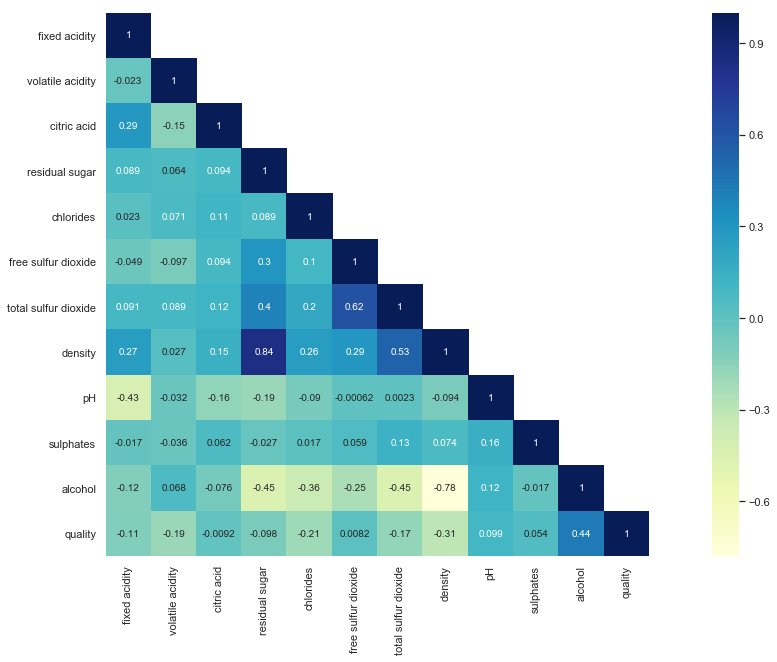

In [4]:
# Compute pairwise correlation of columns, excluding NA/null values
wine_correlation = raw_wine_data.corr()
wine_np_array = np.array(wine_correlation)
# Return the indices for the lower-triangle of array
wine_np_array[np.tril_indices_from(wine_np_array)] = False
# Get a reference to the current figure & render with seaborn
fig=plt.gcf()
fig.set_size_inches(20, 10)
sns.heatmap(data=wine_correlation, mask=wine_np_array, 
            square=True, cmap="YlGnBu", annot=True);

###### 2.4.1 Quality Correlation Ordered (Descending)

In [5]:
wine_correlation['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

### 2.5 Prediction Accuracy Before Processing

In [6]:
# Extract feature and target class data
data = raw_wine_data.iloc[:, :11]
target = raw_wine_data['quality']

def check_accuracy(data, target, return_accu=False):
    """
    Check the accuracy of a data set with kNeighbours Classifier using
    a 80/20 split in favour of the training data.  The accuracy percentage
    to 3 decimal places will be output along with the associate confusion
    matrix showing prediction frequency distribution.
    
    data: (pd.DataFrame) The feature data
    target: (pd.Series) The target class data
    return_accu: (boolean) If the prediction accuracy float value is to be 
      returned
    returns: (float) The prediction accuracy
    """
    
    # Split data into random train and test subsets
    x_train, x_test, y_train, y_test = model_selection.train_test_split(
        data, target, test_size=0.2, random_state=0)
    # Create the model, set random_state to 0 to always replicate same 
    # results
    model = neighbors.KNeighborsClassifier()
    # Fit the day and run classificaion prediction task
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    # Output results
    print("Accuracy: {:.3f}%".format(accuracy * 100))
    print("Confusion matrix:\n{}".format(
        pd.crosstab(y_test, y_pred, rownames=['Actual'],
                    colnames=['Predicted'], margins=True)))
    if return_accu:
        return accuracy

# Run the source data set with no processing applied through model to 
# get base accuracy
check_accuracy(data, target)

Accuracy: 45.510%
Confusion matrix:
Predicted   4    5    6    7   8  All
Actual                               
3           1    6    2    0   0    9
4           3   24   20    4   0   51
5           7  135  137   16   0  295
6           4  111  250   40   4  409
7           0   37   90   54   2  183
8           0    4   19    6   4   33
All        15  317  518  120  10  980


## 3. Data Pre-Processing
Perform various pre-processing functions on data to improve performance of prediction models.<br>
- No missing values
- No feature encoding required
- Dealing with outliers
- Scaling data
    - Standardisation vs Normalisation
- Handling imbalance
    - Check if any category/column is over represented
    - Use SMOTE
- Feature selection
    - Several attributes correlated
    - Univariate Feature Selection
    - Tree-Based Feature Selection
    - Greedy Backward Feature Selection
- Dimensionality reduction

### 3.1 Null/Missing Values
It is important to filter out any null or missing values in the data set, fortunately it is possible to check for these values using the Panda's dataframe isnull() function.  Fortunately the raw data set does not contain any null or missing values so no further action is required.

In [7]:
raw_wine_data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3.2 Encoding Categorical Data
Encoding categorical data or dealing with nominal/ordinal values is not required for this wine quality dataset as all values are continuous variables.

In [8]:
raw_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


## 3.3 Class Imbalance - An In-depth Look
In the wine data set there are 11 features which are determined to contribute to the overall quality score. Using value counts it is possible to calculate the amount of representation a certain feature may have in the dataset.

In [9]:
print(raw_wine_data['quality'].value_counts().sort_index())

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64


From the value counts of the end quality of each wine represented in the data it is clear that there is a large over representation of wine with a quality in the range of 5-7.  What this translates into is missclassification of wines in these quality regions, the confusion matrix below demostrates this.  Most predictions are reasonably close to their expected quality but the majority of predictions fall within the range of the most represented wine qualities.

In [10]:
check_accuracy(data, target)

Accuracy: 45.510%
Confusion matrix:
Predicted   4    5    6    7   8  All
Actual                               
3           1    6    2    0   0    9
4           3   24   20    4   0   51
5           7  135  137   16   0  295
6           4  111  250   40   4  409
7           0   37   90   54   2  183
8           0    4   19    6   4   33
All        15  317  518  120  10  980


<div class="alert alert-block alert-info">
<b>Note:</b> All dataset resampling will be carried out using the SciKit Learn contribution package Imbalanced-Learn, more info can be found <a href="https://github.com/scikit-learn-contrib/imbalanced-learn">here</a>
</div>

#### 3.3.1 Under-sampling
A number of under-sampling techniques were applied to the source dataset to determine if the prediciton model accuracy could be improved upon. These techniques were:
- Naive random under-sampling
- Tomek links
- Neighbourhood cleaning rule

In [11]:
# method for applying the chosen algorithm to the data set
def run_balancer(sampler):
    """
    Run the balancer re-sampling algorith against the data.
    
    sampler: (object) The sampler object with paramaters set if required
    """
    sampler.random_state = 0
    # Resample the dataset and output the new data set shape
    data_resampled, target_resampled = sampler.fit_resample(data, target)
    print("Resampled data set shape: {}".format(
        sorted(Counter(target_resampled).items())))
    # Check the accuracy of the new resampled data set
    check_accuracy(data_resampled, target_resampled)

#### Naive Random Under-Sampling
The random under-sampler will under-sample the majority classes by randomly picking samples with or without replacement.

Typically the random under-sampler will reduce all target classes to the same amount of instances to that of the lowest represented class in the dataset, in this case quality '9' with 5 instances.  This isn't desirable in this case as it would reduce our dataset from approx 5000 instances to 35 instances so would greatly impact the ability to accurately predict the wine quality when working with a large test data set.

Using the resampled data the random forest classifier algorithm was run again to determine the impact on the accuracy.

In [12]:
run_balancer(RandomUnderSampler())

Resampled data set shape: [(3, 5), (4, 5), (5, 5), (6, 5), (7, 5), (8, 5), (9, 5)]
Accuracy: 0.000%
Confusion matrix:
Predicted  3  4  8  9  All
Actual                    
5          1  0  0  0    1
6          0  1  0  1    2
7          0  1  1  0    2
8          1  0  0  1    2
All        2  2  1  2    7


Random under-sampling has rendered the prediction model unusable with a 0% prediction rate.

Using the same random under-sampler with the sampling strategy set to majority it is possible to resample only the majority class which in this case is the quality '6'. Doing so means all other classes can be better predicted but the predicition accuracy for wines with quality '6' are rarely correctly predicted.

In [13]:
run_balancer(RandomUnderSampler(sampling_strategy='majority'))

Resampled data set shape: [(3, 20), (4, 163), (5, 1457), (6, 5), (7, 880), (8, 175), (9, 5)]
Accuracy: 63.216%
Confusion matrix:
Predicted  3   4    5    7   8  All
Actual                             
3          0   0    4    1   0    5
4          1   6   20    3   0   30
5          1  12  220   53   2  288
6          0   0    1    0   0    1
7          0   4   62  108   1  175
8          0   0   10   23   8   41
9          0   0    0    1   0    1
All        2  22  317  189  11  541


This under-sampling technique isn't ideal as this is by far the most represented class in the source dataset so the results are not an accurate representation of the source data or provide a good base from which to predict more wines as wine quality '6' will be the most commonly occurring.  

#### Tomek Links Under-Sampling
Tomek Links detect the 'Tomek's links' between two camples of different classes $x$ and $y$ such that there is no example $z $such that:<br>$d(x, y) < d(x, z) \text{ or } d(y, z) < d(x, y)$ where $d$ is the distance between two samples.

In simpler terms, a Tomek's link exists if the two samples are the nearest neighbour of each other.  In the example below only the majority classes 5, 6, and 7 have been under-sampled.

In [14]:
run_balancer(TomekLinks(sampling_strategy=[5, 6, 7]))

Resampled data set shape: [(3, 20), (4, 163), (5, 1227), (6, 1871), (7, 715), (8, 175), (9, 5)]
Accuracy: 49.880%
Confusion matrix:
Predicted  3   4    5    6    7  8  All
Actual                                 
3          1   0    2    2    0  0    5
4          1   3   14    9    2  0   29
5          0   6  132   97   15  1  251
6          0   6  103  236   37  3  385
7          0   2   22   63   40  0  127
8          0   0    5   18   10  5   38
9          0   0    0    1    0  0    1
All        2  17  278  426  104  9  836


The improvement in accuracy seen by the Tomek's links under-sampling technique is not as significant as that seen by the random under-sampling with majority selection. This is an interesting outcome as there is a defined strategy for defining what to under-sample with the Tomek's links technique whereas random under-sampling by nature is a random selection process.

#### Neighbourhood Cleaning Rule
Neighborhood Cleaning Rule (NCL) modifies the Edited Nearest Neighbor method by increasing the role of data cleaning. Firstly, NCL removes negatives examples which are misclassified by their 3-nearest neighbors. Secondly, the neighbors of each positive examples are found and the ones belonging to the majority class are removed. The same sampling strategy as the Tomek's links under-sampling technique has been applied whereby only classes 5, 6, and 7 have been under-sampled.

In [15]:
run_balancer(NeighbourhoodCleaningRule(sampling_strategy=[5, 6, 7]))

Resampled data set shape: [(3, 20), (4, 163), (5, 767), (6, 1301), (7, 350), (8, 175), (9, 5)]
Accuracy: 69.300%
Confusion matrix:
Predicted  3   4    5    6   7   8  All
Actual                                 
3          1   2    0    1   1   0    5
4          0   4    9    5   0   0   18
5          0   7  108   36  10   1  162
6          0   7   25  213  15   1  261
7          0   0    3   15  53   1   72
8          0   1    6   20   5   7   39
All        1  21  151  290  84  10  557


### 3.3.2 Over-sampling
A number of over-sampling techniques were applied to the source dataset to determine if the prediciton model accuracy could be improved upon. These techniques were:
- Naive random over-sampling
- Synthetic Minority Oversampling Technique (SMOTE)
- Adaptive Synthetic (ADASYN)

#### Naive Random Over-Sampling
The Naive random over-sampling will over-sample the minority classes by randomly picking samples from the dataset.  To do so, it will generate new samples in the classes which are under-represented. The most naive strategy is to generate new samples by randomly sampling with replacement the current available samples. 

In [16]:
run_balancer(RandomOverSampler())

Resampled data set shape: [(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]
Accuracy: 81.579%
Confusion matrix:
Predicted    3    4    5    6    7    8    9   All
Actual                                            
3          447    0    0    0    0    0    0   447
4            0  438    0    0    0    0    0   438
5            3   31  242   83   40    8    0   407
6            2   28  114  173   96   28    1   442
7            0   12   48   57  320   16    0   453
8            0    0    0    0    0  460    0   460
9            0    0    0    0    0    0  431   431
All        452  509  404  313  456  512  432  3078


The results from the naive random over-sampling are very impressive when looking at both the accuracy and the confusion matrix. With an overall accuracy of 92% and the confusion matrix showing strong prediction stats across all classes,  minority classes have seen an improvement with over-sampling applied.  This gives an indication that clustering of each class, even in their original state as minority, were suffering more from a lack of representation than by being classed as outliers. With all classes represented equally, the majority of missclassification can now be seen as focused around the three main classes 5, 6, and 7.

#### Synthetic Minority Oversampling Technique (SMOTE)
Unlike random over-sampling by duplicating some of the original samples of the minority class, SMOTE (and ADASYN) generate new samples by interpolation.  SMOTE will not make any distinction between easy and hard samples to be classified using the nearest neighbour rule, unlike ADASYN which focuses on generating samples next to the original samples which are wrongly classified using k-nearest neighbours.

In [17]:
run_balancer(SMOTE(k_neighbors=4))

Resampled data set shape: [(3, 2198), (4, 2198), (5, 2198), (6, 2198), (7, 2198), (8, 2198), (9, 2198)]
Accuracy: 78.135%
Confusion matrix:
Predicted    3    4    5    6    7    8    9   All
Actual                                            
3          431    9    5    1    0    1    0   447
4           14  395   13   10    4    2    0   438
5           31   39  238   58   26   12    3   407
6           34   41   87  145   76   31   28   442
7            8   16   20   44  335   14   16   453
8            3    1    1    4   14  430    7   460
9            0    0    0    0    0    0  431   431
All        521  501  364  262  455  490  485  3078


Just like random over-sampling, SMOTE over-sampling techniques provide a significant jump in overall accuracy whilst at the same time providing accurate predictions across all classes.

#### Adaptive Synthetic (ADASYN)
As mentioned already, ADASYN generates new samples through interpolation by generating samples next to the original samples which are wrongly classified using k-nearest neighbours.

In [18]:
run_balancer(ADASYN(n_neighbors=4))

Resampled data set shape: [(3, 2196), (4, 2206), (5, 2071), (6, 2198), (7, 2322), (8, 2180), (9, 2200)]
Accuracy: 77.301%
Confusion matrix:
Predicted    3    4    5    6    7    8    9   All
Actual                                            
3          423    5    3    0    0    0    0   431
4           15  403   11    3   11    3    0   446
5           31   47  190   67   26   13    4   378
6           32   48   83  136   90   32   20   441
7           14   22   20   32  344   19   14   465
8            2    1    5    6   13  439    6   472
9            0    0    0    0    0    0  442   442
All        517  526  312  244  484  506  486  3075


ADASYN over-sampling provides both accuracy and confusion matrix results similar to that of SMOTE over-sampling, the main difference being a slight variance in the amount of samples applied to each of the classes. SMOTE over-sampling has a uniform number of samples across all classes whereas ADASYN has a slight variance in quantity.

### 3.3.3 Combination of Over and Under Sampling
To make use of the positives from both over and under sampling there are classes of samplers which use both methods of sampling. For oversampling the SMOTE method is used, but this over-sampling method can generate noisy samples by interpolating new points between outliers and inliers, this can be solved by using the under-sampling cleaning methods Tomek's links and edited nearest-neighbours.  These two classes in the imbalanced learn library are referred to as **SMOTETomek** and **SMOTEENN**.

#### SMOTEENN
Just like Tomek, Edited Nearest Neighbor removes any example whose class label differs from the class of at least two of its three nearest neighbors. The ENN method removes the instances of the majority class whose prediction made by KNN method is different from the majority class. ENN method can remove both the noisy examples as borderline examples, providing a smoother decision surface. ENN tends to remove more examples than the Tomek links does, so it is expected that it will provide a more in depth data cleaning

In [19]:
run_balancer(SMOTEENN(smote=SMOTE(k_neighbors=4)))

Resampled data set shape: [(3, 1983), (4, 1784), (5, 953), (6, 395), (7, 1455), (8, 1994), (9, 2195)]
Accuracy: 94.052%
Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          367    0    3   0    0    0    0   370
4            2  342    3   0    2    2    0   351
5            8   14  165   6    2    3    0   198
6            1    6    8  44   14    5    2    80
7            2    6    1   0  242   12   18   281
8            0    5    0   0    1  421    2   429
9            0    0    0   0    0    0  443   443
All        380  373  180  50  261  443  465  2152


#### SMOTETomek
Tomek links can be used as an under-sampling method or as a data cleaning method. Tomek links to the over-sampled training set as a data cleaning method. Thus, instead of removing only the majority class examples that form Tomek links, examples from both classes are removed

In [20]:
run_balancer(SMOTETomek(smote=SMOTE(k_neighbors=4)))

Resampled data set shape: [(3, 2181), (4, 2158), (5, 2067), (6, 2019), (7, 2135), (8, 2180), (9, 2198)]
Accuracy: 79.752%
Confusion matrix:
Predicted    3    4    5    6    7    8    9   All
Actual                                            
3          430    7    5    3    4    7    0   456
4           14  394   12    7    6    1    1   435
5           28   37  244   44   25    6    5   389
6           20   38   82  125   78   29   13   385
7           14   13   18   24  299   15   12   395
8            3    2    2    8   17  440    5   477
9            0    0    0    0    0    0  451   451
All        509  491  363  211  429  498  487  2988


### 3.4 Scaling Data & Dealing with Outliers
First it is important to determine the outliers in the raw data, from there filtering techniques can be applied to remove the outliers

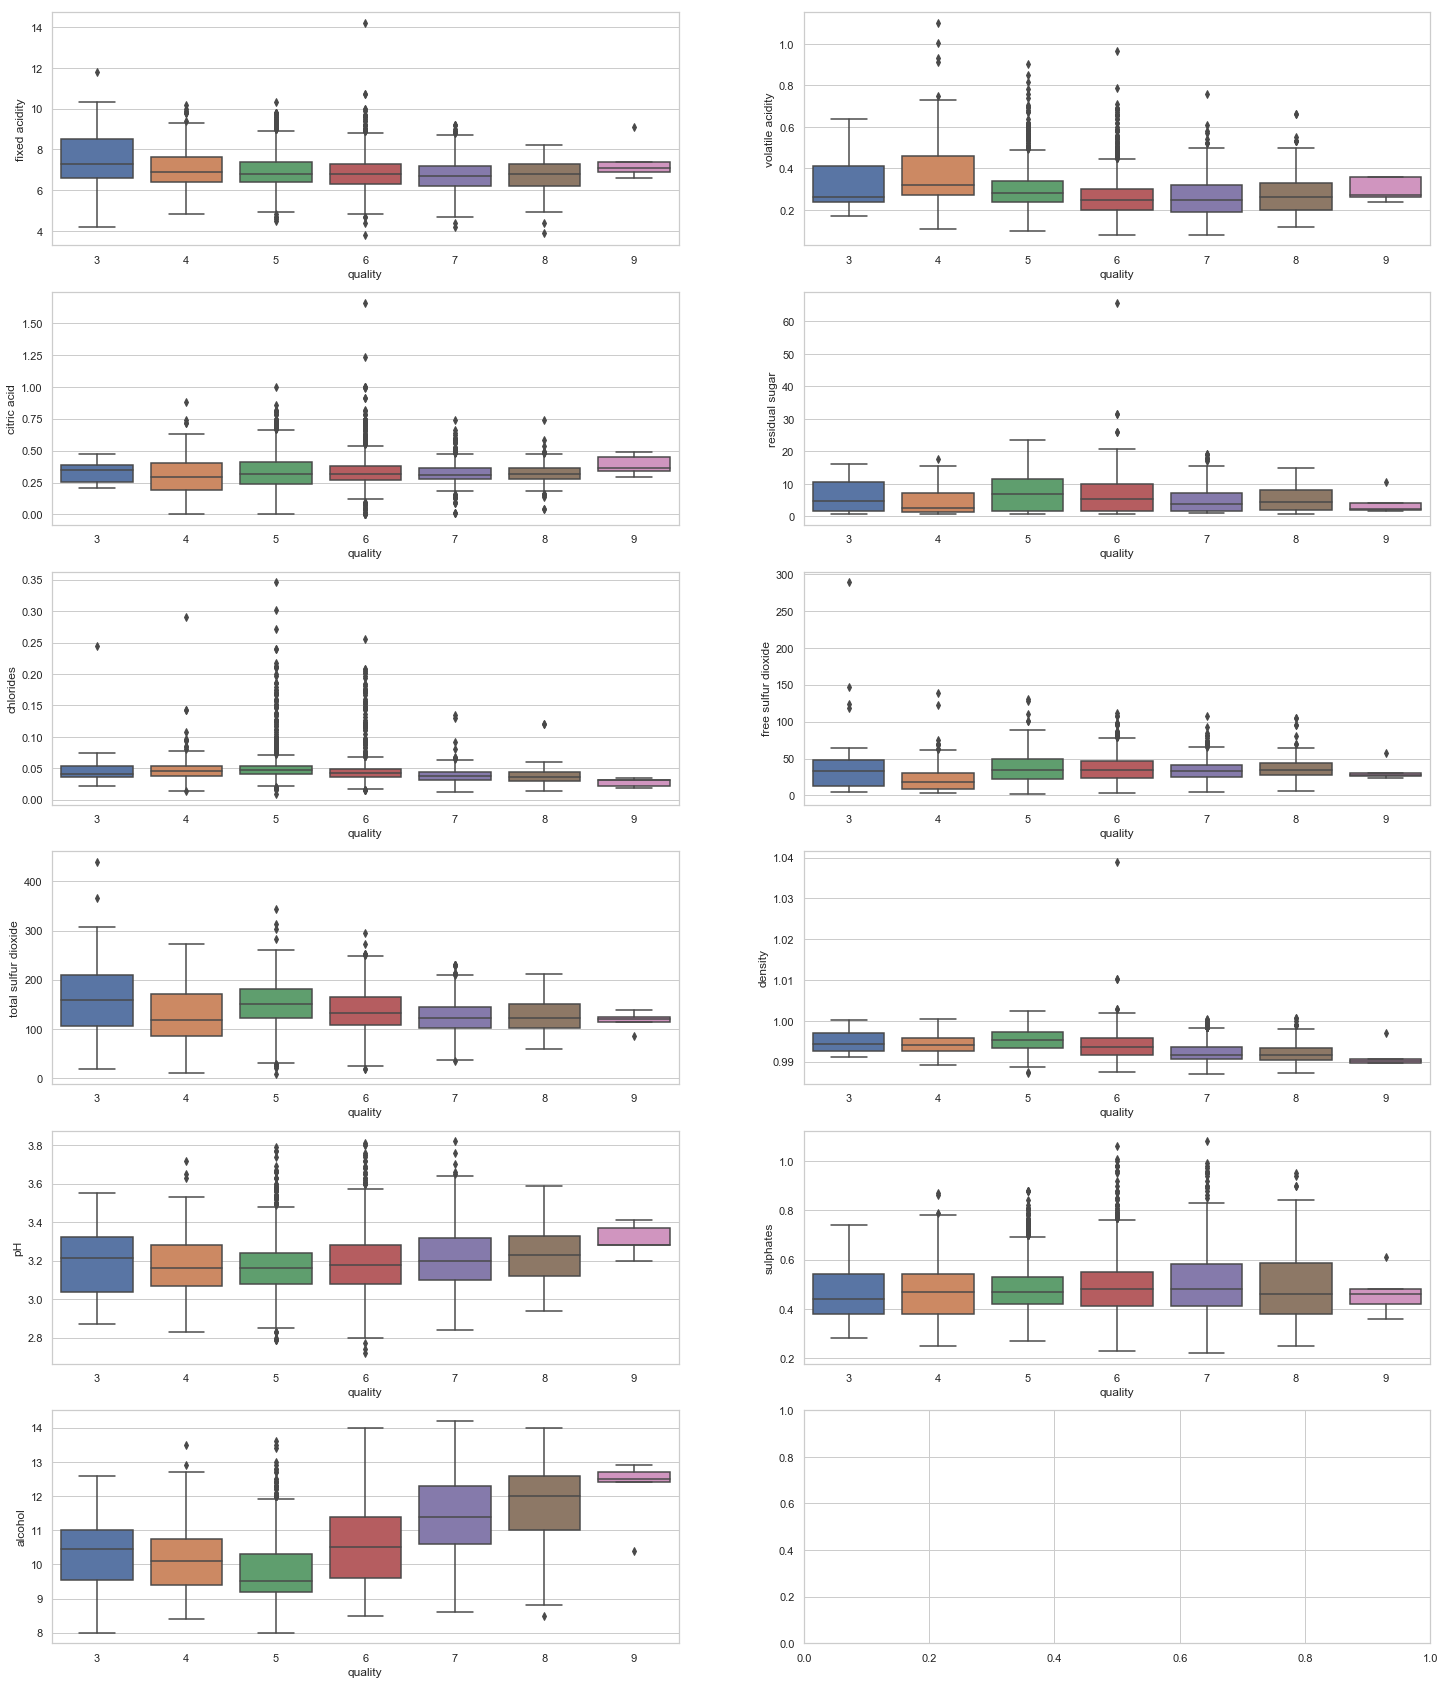

In [21]:
# Get a list of all column names to run outlier algorithm against
column_names = raw_wine_data.columns.values
number_of_column = len(column_names)
# Create a figure and a set of subplots
fig, axarr = plt.subplots(6, 2, figsize=(22, 30))
counter = 0
# For horizontal length
for i in range(6):
    # For vertical length
    for j in range(2):
        # Do not render out a boxplot for quality x quality
        if 'quality' not in column_names[counter]:
            # Render a boxplot using quality for x-axis and feature
            # attribute for y-axis
            sns.boxplot(x='quality', y=column_names[counter], 
                        data=raw_wine_data, ax=axarr[i][j])
            counter += 1
    # If all features are output as boxplots, finish
    if counter == (number_of_column - 1):
        break

There are a number of outliers across all categories/columns in the data as shown by the box plots above.  With some categories there are a large number of outliers so it can be determined that the calculation for determining outliers is very sensitive. <br>

To deal with these the clustering tecnique DBScan will perform multivariate outlier detection, but before this can be run the data needs to be standardized. To do so, the Robist Scaler provided in the pre-processing module of SciKit Learn is used.  Robust Scaler was used over Min/Max Scaler or Standard Scaler as we are dealing with categories with a large number of outliers. Outliers can often influence the sample mean / variance in a negative way, in such cases, the median and the interquartile range often give better results. <br>

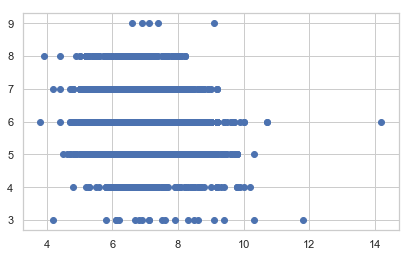

In [22]:
# Drop the target variable from the data so the outliers 
# can be detected from the features
X = raw_wine_data.drop('quality', 1).values

# Plot the current wine quality data to get a representation 
# of outliers when determined, fixed acidity (X) and quality (Y) 
plt.scatter(X[:,0], raw_wine_data['quality']);

In [23]:
# Firstly make a deep copy clone of the original raw 
# data so it can be used in the future
wine_data_robust = raw_wine_data.copy()
# Compute the median and quantiles to be used for scaling 
# and apply robust standardisation to all 
# feature columns leaving the target variable unchanged
scaler = RobustScaler()
wine_data_robust.iloc[:, :11] = scaler.fit_transform(
    wine_data_robust.iloc[:, :11])
# Output a sample of the standardised data set
wine_data_robust.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3488,1.0,-0.545455,-1.000000,-0.463415,-0.500000,-0.391304,-0.864407,-0.653341,-0.789474,-0.071429,0.684211,6
2171,0.6,-0.636364,-0.166667,0.926829,0.714286,0.630435,1.610169,1.110223,-0.210526,0.142857,-0.684211,7
1671,0.2,0.818182,-0.166667,0.158537,-1.071429,-0.304348,-0.796610,-0.031982,1.157895,-0.357143,0.526316,7
561,-0.9,1.000000,-1.833333,-0.439024,1.000000,0.217391,-0.101695,-0.306111,0.315789,0.071429,-0.157895,5
2031,0.8,0.272727,-0.500000,0.158537,-0.071429,-0.086957,0.440678,0.150771,-0.210526,0.000000,0.157895,5


In [24]:
# Test the new standardised data prediction accuracy
target = wine_data_robust['quality']
data = wine_data_robust.iloc[:, :11]
print("Accuracy after scaling:")
check_accuracy(data, target)

Accuracy after scaling:
Accuracy: 53.061%
Confusion matrix:
Predicted   4    5    6    7  8  All
Actual                              
3           0    4    5    0  0    9
4           7   31   10    3  0   51
5           5  170  110   10  0  295
6           1  103  262   41  2  409
7           0   18   84   79  2  183
8           0    2   14   15  2   33
All        13  328  485  148  6  980


Use DBScan to remove the outliers after the data has been standardised.

The new length of the wine data set with outliers removed is: 2322


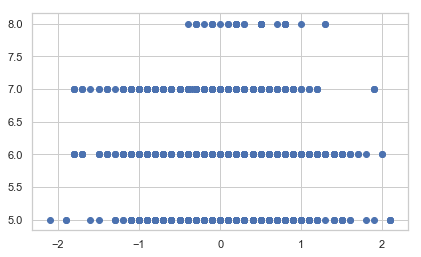

In [25]:
DB = DBSCAN(eps=1, min_samples=3)
DB.fit(wine_data_robust)

wine_data_filtered = wine_data_robust[DB.labels_ != -1]
print("The new length of the wine data set with "
      "outliers removed is: {}".format(
        len(wine_data_filtered)))
plt.scatter(wine_data_filtered.iloc[:, 0], wine_data_filtered['quality'])
plt.show()

In [26]:
# Checking the accuracy of the prediction model with outlier detection applied
data = wine_data_filtered.iloc[:, :11]
target = wine_data_filtered['quality']

print("Classes after outlier filter applied: \n{}\n".format(
    target.value_counts().sort_index()))
check_accuracy(data, target)

Classes after outlier filter applied: 
5     652
6    1173
7     453
8      44
Name: quality, dtype: int64

Accuracy: 70.753%
Confusion matrix:
Predicted    5    6   7  8  All
Actual                         
5           87   30   2  0  119
6           38  184  22  1  245
7            2   36  54  2   94
8            0    1   2  4    7
All        127  251  80  7  465


Removing the outliers from the dataset results in a drastic improvement in the overall prediction accuracy of the ML algorithm but there is a major problem which may not be instantly obvious, there has been a reduction in the amount of target classes from 7 to 4. As the lowest and highest target classes are so under-represented, the outlier detection algorithm classes them as outliers.  

They are outliers by definition, but their importance as target class instances is more important to the overall efficiency of the ML algorithm. If they are removed it will present the possibility that we will instantly have a missclassification if the training data has a target variable which has been removed due to being classed an outlier.

The best approach which could be taken here in terms of the lowest classes and outlier detection is to have the lowest represented classes in the source data set increased, that is, add more samples of wine where the quality is deemed to be 3, 4, or 9. In doing so the source data will be better placed to run a ML algorithm against.

#### 3.4.1 Another Option
Another feasible option here is to classify the wines into categories consisting of relating wine qualities, for example have a new target variable which classifies the wine as poor, normal, and excellent.  
- For poor wines the qualities would be 0-4 giving a new total of 183 sample instances
- For normal wines the qualities would be 5-7 giving a new total of 4535 sample instances
- For excellent wines the qualities would be 8-10 giving a new total of 180 instances
Although there is a very significant class imbalance, it would allow for greater accuracy in predicting a narrower quality of wine quality.

In [27]:
review = []
for i in wine_data_robust['quality']:
    if 1 <= i <= 4:
        review.append('Poor')
    elif 5 <= i <= 7:
        review.append('Standard')
    elif 8 <= i <= 10:
        review.append('Excellent')

wine_data_robust['review'] = review
wine_data_robust.sample(n=5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,review
3937,-0.3,0.909091,0.333333,0.182927,10.142857,0.760870,0.288136,0.351799,-0.052632,-0.357143,-0.578947,5,Standard
1526,7.4,0.090909,1.416667,-0.500000,-0.428571,-0.043478,0.372881,-0.397487,-0.157895,0.500000,0.368421,6,Standard
387,-0.5,1.181818,0.250000,0.085366,-0.214286,2.108696,2.135593,0.082239,-0.315789,1.357143,-0.157895,5,Standard
272,-1.0,-0.090909,-0.500000,0.963415,0.571429,0.434783,0.237288,0.790405,0.578947,-0.642857,-0.578947,5,Standard
932,-0.3,0.000000,-0.333333,0.890244,0.214286,2.000000,1.542373,0.710451,0.000000,-0.428571,-0.210526,6,Standard


Using this new classification method and target class, the random forest classifier returns accuracy values which are approx 90%, up from 80% when outliers were removed and classed not represented, and 60% when imbalances were corrected. Although there is an arguement here that the ML algorithm is not doing its job as intended by predicting exact wine qualities, with the massive over-representation of the 'standard' wine classes it could be counter-argued that this method predicts the poor and excellent classes much better than before. 

In [28]:
# Extract the new review classificaiton and feature data 
# from the standardised data
target = wine_data_robust['review']
data = wine_data_robust.iloc[:, :11]
# Output the data set shape and determine accuracy
print("Before applying outlier detection:")
print("Dataset Shape: \n{}".format(format(
    target.value_counts().sort_index())))
check_accuracy(data, target)

# Apply outlier detection to the new review classification
DB = DBSCAN(eps=1, min_samples=3)
DB.fit(wine_data_robust.iloc[:, :11])
wine_data_filtered = wine_data_robust[DB.labels_ != -1]
target = wine_data_filtered['review']
data = wine_data_filtered.iloc[:, :11]

# Output results of outlier detection
print("\nAfter applying outlier detection:")
print("Dataset size: {}".format(len(wine_data_filtered)))
print("Outliers Removed: {}".format(
    len(wine_data_robust) - len(wine_data_filtered)))
print("Dataset Shape: \n{}".format(format(
    target.value_counts().sort_index())))
check_accuracy(data, target)

Before applying outlier detection:
Dataset Shape: 
Excellent     180
Poor          183
Standard     4535
Name: review, dtype: int64
Accuracy: 90.510%
Confusion matrix:
Predicted  Excellent  Poor  Standard  All
Actual                                   
Excellent          2     0        31   33
Poor               0     4        56   60
Standard           4     2       881  887
All                6     6       968  980

After applying outlier detection:
Dataset size: 3157
Outliers Removed: 1741
Dataset Shape: 
Excellent     111
Poor           60
Standard     2986
Name: review, dtype: int64
Accuracy: 93.196%
Confusion matrix:
Predicted  Excellent  Poor  Standard  All
Actual                                   
Excellent          6     0        19   25
Poor               0     0        17   17
Standard           6     1       583  590
All               12     1       619  632


### 3.5 Feature Selection/Dimensionality Reduction
Another pre-processing option is feature selection, where calculations are run on all the features to determine which have the most impact on the probability of calculating the correct target classification.  The impact should be a reduction in amount of processing required of predicting the classification of the instances in the test data set whilst not impacting the overall prediciton accuracy.

In [29]:
# Reset the data and target for clean comparison
data = raw_wine_data.iloc[:, :11]
target = raw_wine_data['quality']

#### 3.5.1 Select Percentile

In [30]:
# f_classif tells feature selection algorithm this is a classification task
selector_percentile = SelectPercentile(f_classif, percentile=25)
selector_percentile.fit(data, target)

for n, s in zip(wine_data_robust.columns.values, selector_percentile.scores_):
    print("Score : ", s, " for feature ", n)

Score :  12.894791612180219  for feature  fixed acidity
Score :  61.91673867706294  for feature  volatile acidity
Score :  3.2457450938659638  for feature  citric acid
Score :  21.270285175055697  for feature  residual sugar
Score :  42.47225197901322  for feature  chlorides
Score :  19.723674435414853  for feature  free sulfur dioxide
Score :  45.20094879194391  for feature  total sulfur dioxide
Score :  105.85643385006698  for feature  density
Score :  10.103289121029704  for feature  pH
Score :  3.6423168799989507  for feature  sulphates
Score :  229.73477227466051  for feature  alcohol


#### 3.5.2 Select k-Best

In [31]:
selector_kbest = SelectKBest(f_classif)
selector_kbest.fit(data, target)
for n, s in zip(wine_data_robust.columns.values, selector_kbest.scores_):
    print("Score : ", s, " for feature ", n)

Score :  12.894791612180219  for feature  fixed acidity
Score :  61.91673867706294  for feature  volatile acidity
Score :  3.2457450938659638  for feature  citric acid
Score :  21.270285175055697  for feature  residual sugar
Score :  42.47225197901322  for feature  chlorides
Score :  19.723674435414853  for feature  free sulfur dioxide
Score :  45.20094879194391  for feature  total sulfur dioxide
Score :  105.85643385006698  for feature  density
Score :  10.103289121029704  for feature  pH
Score :  3.6423168799989507  for feature  sulphates
Score :  229.73477227466051  for feature  alcohol


#### 3.5.3 Random Forest

In [32]:
forest = RandomForestClassifier(n_estimators=250, random_state=0)
forest.fit(data, target)
importances = forest.feature_importances_
for index in range(len(X[0])):
    print("Importance of feature ", wine_data_robust.columns.values[index],
          "is", importances[index])

Importance of feature  fixed acidity is 0.07523686065169158
Importance of feature  volatile acidity is 0.10024861991955221
Importance of feature  citric acid is 0.08149137581035326
Importance of feature  residual sugar is 0.08830096000755272
Importance of feature  chlorides is 0.08469014199547735
Importance of feature  free sulfur dioxide is 0.09376084422890604
Importance of feature  total sulfur dioxide is 0.09160503875509356
Importance of feature  density is 0.10566121985896498
Importance of feature  pH is 0.0865030046819393
Importance of feature  sulphates is 0.07947399328787513
Importance of feature  alcohol is 0.11302794080259387


Random Forest Classifier takes significantly longer to compute the imporance of the features in the data set compared to select K best and select percentile, whilst returning a different outcome for the imporance of each feature. For example, alcohol is seen as the second biggest contributing feature for both select K best and select percentile, but for Random Forest Classification it is the sixth most important feature.

#### 3.5.4 Feauture Selection Tests with Accuracy 
We can determine the effectiveness of the feature selction algorithms on the accuracy of the prediction model. Cross-validation is used here with cross-fold count set to 10, repeated validation should provide a more accurate overall view of optimal features.

In [33]:
data = raw_wine_data.iloc[:, :11]
target = raw_wine_data['quality']

# k-Neighbours Classifier with cross-validation for baseline
kNN = neighbors.KNeighborsClassifier()
scores = model_selection.cross_val_score(
    kNN, data, target, cv=10)
print("Initial kNN Max Accuracy Result: ", scores.max())

# Select features according to a percentile of the highest scores
selector_percentile = SelectPercentile(f_classif, percentile=25)
selector_percentile.fit(data, target)
print("\nOptimal number of Percentile features is: ",
      len(selector_percentile.get_params()))
data_percentile = selector_percentile.transform(data)
scores_percentile = model_selection.cross_val_score(
    kNN, data_percentile, target, cv=10)
print("Percentile Max Accuracy Result: ", scores_percentile.max())

# Select features according to the k highest scores
selector_kbest = SelectKBest(f_classif, k=5)
selector_kbest.fit(data, target)
print("\nOptimal number of kBest features is ",
      len(selector_kbest.get_params()))
data_kbest = selector_kbest.transform(data)
scores_kbest = model_selection.cross_val_score(
    kNN, data_kbest, target, cv=10)
print("kBest Max Accuracy Result: ", scores_kbest.max())

# Determine optimal tree value
forest = RandomForestClassifier(n_estimators=250, random_state=0)
forest.fit(data, target)
print("\nOptimal number of trees in forest is: ", len(forest.get_params()))
data_random_forest = forest.apply(data)
scores_random_forest = model_selection.cross_val_score(
    kNN, data_random_forest, target, cv=10)
print("Random Forest Classifier Max Accuracy Result: ", scores_random_forest.max())

# Feature ranking with recursive feature elimination and cross-validated 
# selection of the best number of features
estimator = linear_model.LogisticRegression()
selector_greedy = RFECV(estimator, cv=10)
selector_greedy.fit(data, target)
print("\nOptimal number of RFECV features is: ", selector_greedy.n_features_)
data_greedy = data.loc[:, selector_greedy.support_]
scores_greedy = model_selection.cross_val_score(
    kNN, data_greedy, target, cv=10)
print("RFECV Max Accuracy Result: ", scores_greedy.max())

# Principal component analysis (PCA)
# Linear dimensionality reduction using Singular Value Decomposition of 
# the data to project it to a lower dimensional space
selector_pca = PCA()
selector_pca.fit(data, target)
print("\nOptimal number of PCA features is: ", selector_pca.n_features_)
data_pca = selector_pca.transform(data)
scores_pca = model_selection.cross_val_score(
    kNN, data_pca, target, cv=10)
print("PCA Max Accuracy Result: ", scores_greedy.max())

Initial kNN Max Accuracy Result:  0.4517453798767967

Optimal number of Percentile features is:  2
Percentile Max Accuracy Result:  0.49075975359342916

Optimal number of kBest features is  2
kBest Max Accuracy Result:  0.48261758691206547

Optimal number of trees in forest is:  17
Random Forest Classifier Max Accuracy Result:  0.5766871165644172

Optimal number of RFECV features is:  9
RFECV Max Accuracy Result:  0.4887063655030801

Optimal number of PCA features is:  11
PCA Max Accuracy Result:  0.4887063655030801


Again random forest takes a very long time here to run in comparison to kBest and Percentile whilst not providing any tangible improvment in the accuracy of the predicitions.

## 3.6 Test: Running Best Pre-Processing Combinations 

In [34]:
# Firstly make a deep copy clone of the original raw 
# data so it can be used in the future
wine_data = raw_wine_data.copy()
# Standardise Data
scaler = RobustScaler()
wine_data.iloc[:, :11] = scaler.fit_transform(wine_data.iloc[:, :11])

# Create new broader review category for A|B comparison
review = []
for i in wine_data['quality']:
    if 1 <= i <= 4:
        review.append('Poor')
    elif 5 <= i <= 7:
        review.append('Standard')
    elif 8 <= i <= 10:
        review.append('Excellent')
wine_data['review'] = review

# Apply re-balancing algorithm
processed_data_quality = wine_data.iloc[:, :11]
processed_target_quality = wine_data['quality']
processed_target_review = wine_data['review']

# SMOTEENN(random_state=0) >>> Better for quality
# RandomOverSampler >>> Better for review
resampled_data_quality, resampled_target_quality = SMOTEENN(
    random_state=0, smote=SMOTE(k_neighbors=4)).fit_resample(
        processed_data_quality, processed_target_quality)
resampled_data_review, resampled_target_review = RandomOverSampler(
    random_state=0).fit_resample(
        processed_data_quality, processed_target_review)

# Base dataset run results again for comparison
print("Base dataset results with no processing applied:")
base_accuracy = check_accuracy(data, target, return_accu=True)

# Test RFC with no feature selection applied on processed data for 
# quality classification
nfopt_forest_quality = RandomForestClassifier(n_estimators=250, random_state=0)
nfopt_forest_quality.fit(resampled_data_quality, resampled_target_quality)
scores_random_forest_quality = model_selection.cross_val_score(
    nfopt_forest_quality, resampled_data_quality, resampled_target_quality, cv=10)
print( "\nRun results for pre-processed wine data-set targeting quality "
       "classification with no feature selection:")
nfopt_quality_accuracy = check_accuracy(resampled_data_quality,
                                        resampled_target_quality,
                                        return_accu=True)

# Test RFC with feature selection applied on processed data for 
# quality classification
fopt_forest_quality = RandomForestClassifier(n_estimators=250, random_state=0)
fopt_forest_quality.fit(resampled_data_quality, resampled_target_quality)
data_random_forest_quality = fopt_forest_quality.apply(resampled_data_quality)
scores_random_forest_quality = model_selection.cross_val_score(
    fopt_forest_quality, data_random_forest_quality, resampled_target_quality, cv=10)
print( "\nRun results for pre-processed wine data-set targeting quality "
       "classification with feature selection:")
fopt_quality_accuracy = check_accuracy(data_random_forest_quality,
                                       resampled_target_quality,
                                       return_accu=True)

# Test RFC with no feature selection applied on processed data for 
# review classification
nfopt_forest_review = RandomForestClassifier(n_estimators=250, random_state=0)
nfopt_forest_review.fit(resampled_data_review, resampled_target_review)
scores_random_forest_review = model_selection.cross_val_score(
    nfopt_forest_review, resampled_data_review, resampled_target_review, cv=10)
print( "\nRun results for pre-processed wine data-set targeting review "
       "classification with no feature selection:")
nfopt_review_accuracy = check_accuracy(resampled_data_review,
                                 resampled_target_review,
                                 return_accu=True)

# Test RFC with feature selection applied on processed data for 
# review classification
fopt_forest_review = RandomForestClassifier(n_estimators=250, random_state=0)
fopt_forest_review.fit(resampled_data_review, resampled_target_review)
data_random_forest_review = fopt_forest_review.apply(resampled_data_review)
scores_random_forest_review = model_selection.cross_val_score(
    fopt_forest_review, data_random_forest_review, resampled_target_review, cv=10)
print( "\nRun results for pre-processed wine data-set targeting review "
       "classification with feature selection:")
fopt_review_accuracy = check_accuracy(data_random_forest_review,
                                      resampled_target_review,
                                      return_accu=True)

print("\nImprovement for Quality accuracy with no feature selection: {:.3f}%".format(
    (nfopt_quality_accuracy - base_accuracy) * 100))
print("Improvement for Quality accuracy with feature selection: {:.3f}%".format(
    (fopt_quality_accuracy - base_accuracy) * 100))
print("Improvement for Review accuracy with no feature selection: {:.3f}%".format(
    (nfopt_review_accuracy - base_accuracy) * 100))
print("Improvement for Review accuracy with feature selection: {:.3f}%".format(
    (fopt_review_accuracy - base_accuracy) * 100))

Base dataset results with no processing applied:
Accuracy: 45.510%
Confusion matrix:
Predicted   4    5    6    7   8  All
Actual                               
3           1    6    2    0   0    9
4           3   24   20    4   0   51
5           7  135  137   16   0  295
6           4  111  250   40   4  409
7           0   37   90   54   2  183
8           0    4   19    6   4   33
All        15  317  518  120  10  980

Run results for pre-processed wine data-set targeting quality classification with no feature selection:
Accuracy: 96.521%
Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          416    0    0   0    0    0    0   416
4            0  441    0   0    0    0    0   441
5            4    8  219   1    3    1    0   236
6            4    3   13  67   19    6    0   112
7            3    6    2   1  350    9    2   373
8            0    0    0   0    0  418    0   418
9            0    0    0   0    

## 4. Modelling Algorithms
With pre-processing completed modelling can be investigated to determine performance of various algorithms. In particular the following will be tested:

- Ada Boost Classifier
- Decision Trees
- Gaussian Naive Bayes
- Gradient Boosting
- k Neighbours
- Linear Support Vector Classifier
- Logistic Regression
- Random Forests
- Stochastic Gradient Decent Classifier
- Support Vector Classifier

In [35]:
# Same as check accuracy above but this version can accept a model instead
# of default to kNN for classifier
def check_model_accuracy(data, target, model):
    x_train, x_test, y_train, y_test = model_selection.train_test_split(
        data, target, test_size=0.2, random_state=0)
    model.random_state = 0
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: {:.3f}%".format(accuracy * 100))
    print("Confusion matrix:\n{}".format(
        pd.crosstab(y_test, y_pred, rownames=['Actual'],
                    colnames=['Predicted'], margins=True)))
    return accuracy


# Use the 'quality' pre-processed data from the previous section to 
# create our training and test sets
model_data = resampled_data_quality.copy()
model_data_target = resampled_target_quality.copy()

#### 4.1 Ada Boost Classifier
An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [36]:
ada_accuracy = check_model_accuracy(
    model_data, model_data_target, AdaBoostClassifier())

Accuracy: 39.623%
Confusion matrix:
Predicted    3    4   5    7    8    9   All
Actual                                      
3          124  215  15    9   53    0   416
4          184  221   9    9   17    1   441
5           25  194   7    6    4    0   236
6            3   67   8   10   20    4   112
7            5  122  16   48  148   34   373
8            8   86  11   36  224   53   418
9            0    0   0    3  100  344   447
All        349  905  66  121  566  436  2443


#### 4.2 Decision Tree Classifier
Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

In [37]:
dtc_accuracy = check_model_accuracy(
    model_data, model_data_target, DecisionTreeClassifier())

Accuracy: 91.895%
Confusion matrix:
Predicted    3    4    5    6    7    8    9   All
Actual                                            
3          406    4    2    2    2    0    0   416
4            6  403   16   10    5    1    0   441
5            2   16  200    7    8    2    1   236
6            1    2    5   80   16    7    1   112
7            1    6    2    8  316   39    1   373
8            0    3    2    5   14  393    1   418
9            0    0    0    0    0    0  447   447
All        416  434  227  112  361  442  451  2443


#### 4.3 Gaussian Naive Bayes
GaussianNB implements the Gaussian Naive Bayes algorithm for classification.

In [38]:
gnb_accuracy = check_model_accuracy(
    model_data, model_data_target, GaussianNB())

Accuracy: 53.336%
Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          138   80   88   0   55   30   25   416
4           14  276   82   0   45   24    0   441
5            9   49  148   5   20    5    0   236
6            3    7   37   8   35   21    1   112
7            2   17   44   2  147  105   56   373
8            4    2   31   7  169  153   52   418
9            0   11    0   0    0    3  433   447
All        170  442  430  22  471  341  567  2443


#### 4.4 Gradient Boosting
Gradient Boosting for classification. GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage n_classes_ regression trees are fit on the negative gradient of the binomial or multinomial deviance loss function. Binary classification is a special case where only a single regression tree is induced.

In [39]:
gbc_accuracy = check_model_accuracy(
    model_data, model_data_target, GradientBoostingClassifier())

Accuracy: 88.007%
Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          412    3    1   0    0    0    0   416
4            9  401   18   1   10    2    0   441
5           10   24  184   5    7    6    0   236
6            3    1   21  41   33   13    0   112
7            9    5   13   0  281   65    0   373
8            2    4    2   2   21  384    3   418
9            0    0    0   0    0    0  447   447
All        445  438  239  49  352  470  450  2443


#### 4.5 k-Neighbours
Classifier implementing the k-nearest neighbors vote.

In [40]:
knc_accuracy = check_model_accuracy(
    model_data, model_data_target, KNeighborsClassifier())

Accuracy: 96.521%
Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          416    0    0   0    0    0    0   416
4            0  441    0   0    0    0    0   441
5            4    8  219   1    3    1    0   236
6            4    3   13  67   19    6    0   112
7            3    6    2   1  350    9    2   373
8            0    0    0   0    0  418    0   418
9            0    0    0   0    0    0  447   447
All        427  458  234  69  372  434  449  2443


#### 4.6 Linear SVC
Linear Support Vector Classification.  Similar to SVC with parameter kernel=’linear’, but implemented in terms of liblinear rather than libsvm, so it has more flexibility in the choice of penalties and loss functions and should scale better to large numbers of samples.

In [41]:
lsvc_accuracy = check_model_accuracy(
    model_data, model_data_target, LinearSVC())

Accuracy: 54.973%
Confusion matrix:
Predicted    3    4    5    7    8    9   All
Actual                                       
3          155  141   10    0   83   27   416
4           37  332   50    4   18    0   441
5           47   85   90    3   11    0   236
6           18    9   26   19   39    1   112
7           38   39   25   55  209    7   373
8           44   31   23   43  264   13   418
9            0    0    0    0    0  447   447
All        339  637  224  124  624  495  2443


#### 4.7 Logistic Regression
Logistic Regression (aka logit, MaxEnt) classifier.

In [42]:
lr_accuracy = check_model_accuracy(
    model_data, model_data_target, LogisticRegression())

Accuracy: 54.851%
Confusion matrix:
Predicted    3    4    5    7    8    9   All
Actual                                       
3          158  109   12   11   86   40   416
4           50  318   49    7   17    0   441
5           49   74   97    7    9    0   236
6           21    6   26   19   38    2   112
7           48   20   21   73  198   13   373
8           50   20   18   67  247   16   418
9            0    0    0    0    0  447   447
All        376  547  223  184  595  518  2443


#### 4.8 Random Forest
A random forest classifier.  A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).

In [43]:
rf_accuracy = check_model_accuracy(
    model_data, model_data_target, RandomForestClassifier())

Accuracy: 96.316%
Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          415    0    0   0    1    0    0   416
4            0  430    5   0    6    0    0   441
5            0    9  221   1    3    2    0   236
6            2    3    8  75   20    4    0   112
7            0    5    4   1  355    8    0   373
8            0    0    1   0    7  410    0   418
9            0    0    0   0    0    0  447   447
All        417  447  239  77  392  424  447  2443


#### 4.9 Stochastic Gradient Decent Classifier
Linear classifiers (SVM, logistic regression, a.o.) with SGD training.  This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). SGD allows minibatch (online/out-of-core) learning, see the partial_fit method. For best results using the default learning rate schedule, the data should have zero mean and unit variance.

In [44]:
sgdc_accuracy = check_model_accuracy(
    model_data, model_data_target, SGDClassifier())

Accuracy: 44.003%
Confusion matrix:
Predicted    3    4    5   6    7   8    9   All
Actual                                          
3           52   69  160   4  114   0   17   416
4           33  164  199  13   32   0    0   441
5            9   31  148   3   44   0    1   236
6            1    7   30   7   63   2    2   112
7           26    8   57  25  245   5    7   373
8           57    7   64  22  253  12    3   418
9            0    0    0   0    0   0  447   447
All        178  286  658  74  751  19  477  2443


#### 4.10 Support Vector Classifier
C-Support Vector Classification.  The implementation is based on libsvm. The fit time complexity is more than quadratic with the number of samples which makes it hard to scale to dataset with more than a couple of 10000 samples.

In [45]:
svc_accuracy = check_model_accuracy(
    model_data, model_data_target, SVC())

Accuracy: 83.545%
Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          416    0    0   0    0    0    0   416
4           16  396   12   5    9    3    0   441
5            7   44  166   2    6   11    0   236
6            3    3   20  23   52   11    0   112
7            2    9   12   1  243  101    5   373
8            0    6    2   1   59  350    0   418
9            0    0    0   0    0    0  447   447
All        444  458  212  32  369  476  452  2443


#### 4.11 Comparing Model Accuracy

In [46]:
models = ['Ada Boost Classifier', 'Decision Tree Classifier', 'Gaussian NB',
          'Gradient Boosting Classifier', 'K Neighbors Classifier',
          'Linear SVC', 'Logistic Regression', 'Random Forest Classifier', 
          'SGD Classifier', 'SVC']

model_results = [ada_accuracy, dtc_accuracy, gnb_accuracy, gbc_accuracy,
                 knc_accuracy, lsvc_accuracy, lr_accuracy, rf_accuracy,
                 sgdc_accuracy, svc_accuracy]

model_data = {'Modelling Algorithm': models, 'Accuracy': model_results}

model_data_df = pd.DataFrame(model_data)
model_data_df

,Modelling Algorithm,Accuracy
0,Ada Boost Classifier,0.396234
1,Decision Tree Classifier,0.918952
2,Gaussian NB,0.533361
3,Gradient Boosting Classifier,0.880065
4,K Neighbors Classifier,0.965207
5,Linear SVC,0.549734
6,Logistic Regression,0.548506
7,Random Forest Classifier,0.963160
8,SGD Classifier,0.440033
9,SVC,0.835448


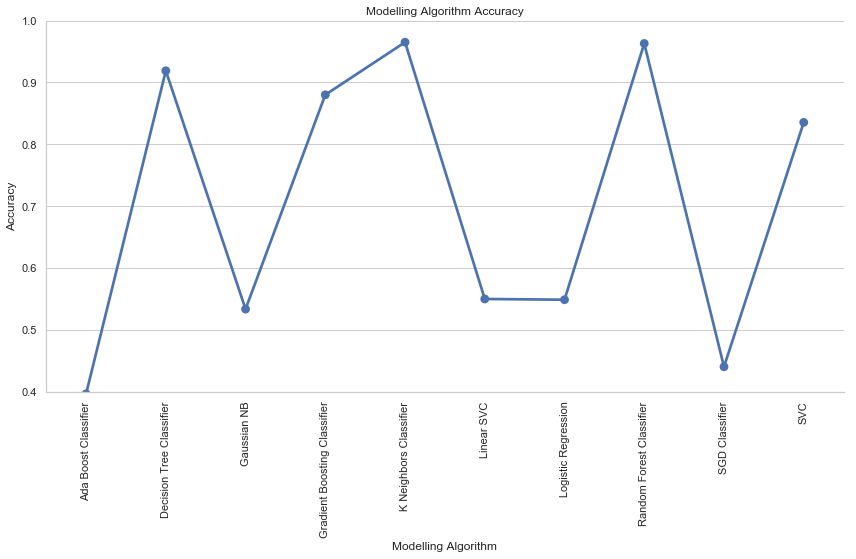

In [47]:
g = sns.factorplot(x='Modelling Algorithm', y='Accuracy', data=model_data_df,
                   kind='point', size=6, aspect=2)
g.set_xticklabels(rotation=90)
plt.ylim(0.4, 1.0)
plt.title("Modelling Algorithm Accuracy");

## 5. Hyper-Parameter Optimisation
The three best algorithms from the modelling tests are:

In [48]:
model_data_df.nlargest(3, 'Accuracy')

,Modelling Algorithm,Accuracy
4,K Neighbors Classifier,0.965207
7,Random Forest Classifier,0.963160
1,Decision Tree Classifier,0.918952


Using these three models, hyper-parameter optimisation will be carried out with each to determine if it is possible to further increase the accuracy of each model.  During previous tests all parameters were set as their default values with the exception of random_state which was set to 0 so all results could be replicated time after time.

For hyper-parameter optimisation two approaches will be tested, grid-search and random cross validation.

In [49]:
# Make a copy of the data from the processing stage
model_data = resampled_data_quality.copy()
model_data_target = resampled_target_quality.copy()
# Create test and training data subsets
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    model_data, model_data_target, test_size=0.2, random_state=0)


def evaluate_optimisation_model(model, params_dict, x_train, 
                                x_test, y_train, y_test, grid_seach=True):
    """
    Given a classifier model, perform hyper-parameter optimisation on a 
    set of parameters for a data set.  Choice of grid-search and
    randomised search available.
    
    model: (object) The classification model
    params_dict: (dict) The parameters to be used during optimisation
    x_train: (np.ndarray) Feature Training data set
    x_test: (np.ndarray) Feature Test data set
    y_train: (np.ndarray) Target Training data set
    x_test: (np.ndarray) Target Test data set
    grid_search: (boolean) If GridSearch or RandomisedSearch is in use
    returns: (float) Accuracy in range 0-1    
    """
    if grid_search:
        opt_model = GridSearchCV(estimator=model, 
                                 param_grid=params_dict, 
                                 scoring='accuracy',cv=10)
    else:
        opt_model = RandomizedSearchCV(estimator=model, 
                                       param_distributions=params_dict, 
                                       scoring='accuracy',cv=10, n_iter=50)
    # Fit the model to the training data and run test data classification
    opt_model.fit(x_train, y_train)
    y_pred = opt_model.predict(x_test)
    # Calculate accuracy of test classification
    accuracy = accuracy_score(y_test, y_pred)

    # best_score_ = average of all cv folds
    print("The best RFC accuracy found during optimisation: {}%".format(
        opt_model.best_score_))
    print("The best RFC combination of parameters: {}".format(
        opt_model.best_params_))
    # accuracy = fraction of correctly classified samples
    print("RFC Accuracy: {:.3f}%".format(accuracy * 100))
    print("RFC Confusion matrix:\n{}".format(
        pd.crosstab(y_test, y_pred, rownames=['Actual'],
                    colnames=['Predicted'], margins=True)))
    print("\n", classification_report(y_test, y_pred))
    
    return accuracy

<div class="alert alert-block alert-info">
<b>Hyper-Parameter Optimisation Jobs:</b> It can take a considerable amount of time to run these jobs depending on your computer hardware specification. To speed things up a bit for kNN and Random Forest optimisation you can set n_jobs parameter below to -1 to run the optimisation tasks on all cores. Be warned, these will ramp up Python to use 100% of CPU.  If you would rather specify a upper limit on the amount of threads instead set n_jobs to any positive integer. The default 'None' will use only one thread. It is not possible to set n_jobs for Decision Tree optimisation.
</div>

<div class="alert alert-block alert-info">
<b>Hyper-Parameter Optimisation Search Type:</b> If you would like to run random search optimisaiton instead of grid search optimisation as default, change grid_search below to False.
</div>

In [50]:
custom_n_jobs = None
grid_search = True

#### 5.1 K-Neighbours Classifier
The following parameters will be fine-tuned:
- n_neighbors: Number of neighbors to use by default for kneighbors queries.
- weights: weight function used in prediction.
- p: Power parameter for the Minkowski metric. 

In [51]:
knn_params_dict={'n_neighbors':list(range(1, 20)), 'p':[1, 2, 3], 
                'weights': ['uniform', 'distance']}

knn_model = KNeighborsClassifier(n_jobs=custom_n_jobs)

hpo_knn_accuracy = evaluate_optimisation_model(knn_model, 
                                               knn_params_dict, 
                                               x_train, x_test, 
                                               y_train, y_test, 
                                               grid_search)

The best RFC accuracy found during optimisation: 0.986489252814739%
The best RFC combination of parameters: {'weights': 'distance', 'p': 3, 'n_neighbors': 2}
RFC Accuracy: 99.140%
RFC Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          416    0    0   0    0    0    0   416
4            0  441    0   0    0    0    0   441
5            0    3  232   0    1    0    0   236
6            3    2    3  97    4    3    0   112
7            0    0    0   0  371    2    0   373
8            0    0    0   0    0  418    0   418
9            0    0    0   0    0    0  447   447
All        419  446  235  97  376  423  447  2443

               precision    recall  f1-score   support

           3       0.99      1.00      1.00       416
           4       0.99      1.00      0.99       441
           5       0.99      0.98      0.99       236
           6       1.00      0.87      0.93       112
           7       0.99  

#### 5.2 Random Forest Classifier
The following parameters will be fine-tuned:
- criterion: The function to measure the quality of a split. 
- n_estimators: The number of trees in the forest.
- max_features: The number of features to consider when looking for the best split.

In [52]:
rfc_params_dict = {'criterion': ['gini', 'entropy'],
                  'n_estimators': [100, 200, 300, 400],
                  'max_features': ['auto', 'sqrt', 'log2']}

rfc_model = RandomForestClassifier(n_jobs=custom_n_jobs, random_state=0)

hpo_rfc_accuracy = evaluate_optimisation_model(rfc_model,
                                               rfc_params_dict, 
                                               x_train, x_test, 
                                               y_train, y_test, 
                                               grid_search)

The best RFC accuracy found during optimisation: 0.9663254861821904%
The best RFC combination of parameters: {'n_estimators': 200, 'max_features': 'auto', 'criterion': 'entropy'}
RFC Accuracy: 97.135%
RFC Confusion matrix:
Predicted    3    4    5   6    7    8    9   All
Actual                                           
3          413    2    0   0    1    0    0   416
4            0  434    4   0    3    0    0   441
5            0    5  225   2    4    0    0   236
6            1    1    7  77   22    4    0   112
7            0    5    1   1  360    6    0   373
8            0    0    0   0    1  417    0   418
9            0    0    0   0    0    0  447   447
All        414  447  237  80  391  427  447  2443

               precision    recall  f1-score   support

           3       1.00      0.99      1.00       416
           4       0.97      0.98      0.98       441
           5       0.95      0.95      0.95       236
           6       0.96      0.69      0.80       112
    

#### 5.3 Decision Tree Classifier
The following parameters will be fine-tuned:
- criterion: The function to measure the quality of a split. 
- max_features: The number of features to consider when looking for the best split.
- splitter: The strategy used to choose the split at each node.

In [53]:
dtc_params_dict = {'criterion': ['gini', 'entropy'],
                   'max_features': ['auto', 'sqrt', 'log2', None],
                   'splitter': ['best', 'random']}

dtc_model = DecisionTreeClassifier(random_state=0)

hpo_dtc_accuracy = evaluate_optimisation_model(dtc_model, 
                                               dtc_params_dict, 
                                               x_train, x_test, 
                                               y_train, y_test, 
                                               grid_search)

The best RFC accuracy found during optimisation: 0.9188331627430911%
The best RFC combination of parameters: {'splitter': 'best', 'max_features': None, 'criterion': 'entropy'}
RFC Accuracy: 93.164%
RFC Confusion matrix:
Predicted    3    4    5    6    7    8    9   All
Actual                                            
3          411    0    2    2    1    0    0   416
4            2  410   16    6    1    6    0   441
5            3   14  201    8    7    3    0   236
6            1    0    8   82   10   10    1   112
7            4    4    8    6  322   29    0   373
8            0    2    0    2   10  403    1   418
9            0    0    0    0    0    0  447   447
All        421  430  235  106  351  451  449  2443

               precision    recall  f1-score   support

           3       0.98      0.99      0.98       416
           4       0.95      0.93      0.94       441
           5       0.86      0.85      0.85       236
           6       0.77      0.73      0.75       1

#### 5.4 Evaluation of Optimisation

In [54]:
# Calculate the difference in the prediction accuracy before and after
# hyper-parameter optimisation
comparison_df = model_data_df.nlargest(3, 'Accuracy')
comparison_df = comparison_df.assign(
    e=[hpo_knn_accuracy, hpo_rfc_accuracy, hpo_dtc_accuracy])
improvement = (comparison_df['e'] - comparison_df['Accuracy']) * 100
comparison_df = comparison_df.assign(f=improvement)
comparison_df.rename(columns={'Accuracy': 'Model Accuracy',
                              'e': 'Optimised Accuracy',
                              'f': 'Improvement %'}, inplace=True)
comparison_df

,Modelling Algorithm,Model Accuracy,Optimised Accuracy,Improvement %
4,K Neighbors Classifier,0.965207,0.991404,2.619730
7,Random Forest Classifier,0.963160,0.971347,0.818666
1,Decision Tree Classifier,0.918952,0.931641,1.268932
